In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import html5lib
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

Get the URL in variable

In [2]:
url ="https://www.zipcodesonline.com/2020/06/postal-code-of-toronto-in-2020.html"

Read the HTML using pandas into a dataframe

In [3]:
webdata = pd.read_html(url, flavor ='bs4')
webdata

[                        0
 0  Postal Code of Toronto,
            0                  1             2                 3
 0    SL. NO.      NEIGHBOURHOOD  POSTAL CODES          DISTRICT
 1        NaN                NaN           NaN               NaN
 2          1           Adelaide           M5H  Downtown Toronto
 3          2    Agincourt North           M1V       Scarborough
 4          3          Agincourt           M1S       Scarborough
 ..       ...                ...           ...               ...
 202      201  Woodbine Gardens,           M4B         East York
 203      202   Woodbine Heights           M4C         East York
 204      203    York Mills West           M2P        North York
 205      204         York Mills           M2L        North York
 206      205          Yorkville           M5R   Central Toronto
 
 [207 rows x 4 columns]]

In [4]:
df = pd.DataFrame(webdata[1])
df.head()

,0,1,2,3
0,SL. NO.,NEIGHBOURHOOD,POSTAL CODES,DISTRICT
1,NaN,NaN,NaN,NaN
2,1,Adelaide,M5H,Downtown Toronto
3,2,Agincourt North,M1V,Scarborough
4,3,Agincourt,M1S,Scarborough


Drop SL.NO column

In [5]:
df.drop(df.columns[0],axis=1, inplace =True)
df.head()

,1,2,3
0,NEIGHBOURHOOD,POSTAL CODES,DISTRICT
1,NaN,NaN,NaN
2,Adelaide,M5H,Downtown Toronto
3,Agincourt North,M1V,Scarborough
4,Agincourt,M1S,Scarborough


Add the column names and remove the first row

In [6]:
col = df.iloc[0] 
df.columns = col
df.drop(df.index[0], inplace =True)
df.head()

,NEIGHBOURHOOD,POSTAL CODES,DISTRICT
1,NaN,NaN,NaN
2,Adelaide,M5H,Downtown Toronto
3,Agincourt North,M1V,Scarborough
4,Agincourt,M1S,Scarborough
5,Albion Gardens,M9V,Etobicoke


Rename and re-arrange the columns

In [7]:
df = df.rename(columns= {'NEIGHBOURHOOD':'Neighbourhood','POSTAL CODES':'PostalCode','DISTRICT':'Borough'})
df.head()

,Neighbourhood,PostalCode,Borough
1,NaN,NaN,NaN
2,Adelaide,M5H,Downtown Toronto
3,Agincourt North,M1V,Scarborough
4,Agincourt,M1S,Scarborough
5,Albion Gardens,M9V,Etobicoke


In [8]:
name = list(df.columns[1:]) + [df.columns[0]]
print(name)
df = df[name]
df.head()

['PostalCode', 'Borough', 'Neighbourhood']


,PostalCode,Borough,Neighbourhood
1,NaN,NaN,NaN
2,M5H,Downtown Toronto,Adelaide
3,M1V,Scarborough,Agincourt North
4,M1S,Scarborough,Agincourt
5,M9V,Etobicoke,Albion Gardens


Drop the un-assigned borough

In [9]:
df.dropna(subset=['Borough'],axis=0, inplace = True)
df.head()

,PostalCode,Borough,Neighbourhood
2,M5H,Downtown Toronto,Adelaide
3,M1V,Scarborough,Agincourt North
4,M1S,Scarborough,Agincourt
5,M9V,Etobicoke,Albion Gardens
6,M8W,Etobicoke,Alderwood


In [10]:
df.sort_values(by=['PostalCode'],inplace= True)
df.reset_index(drop = True,inplace= True)
df.head(10)

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,Rouge
1,M1B,Scarborough,Malvern
2,M1C,Scarborough,Highland Creek
3,M1C,Scarborough,Rouge Hill
4,M1C,Scarborough,Port Union
5,M1E,Scarborough,Morningside
6,M1E,Scarborough,West Hill
7,M1E,Scarborough,Guildwood
8,M1G,Scarborough,Woburn
9,M1H,Scarborough,Cedarbrae


In [11]:
dfNEW=df[['PostalCode','Neighbourhood']]
dfNEW

,PostalCode,Neighbourhood
0,M1B,Rouge
1,M1B,Malvern
2,M1C,Highland Creek
3,M1C,Rouge Hill
4,M1C,Port Union
...,...,...
200,M9V,Mount Olive
201,M9V,Albion Gardens
202,M9V,Humbergate
203,M9W,Northwest


Merge the Neighbourhoods having same PostelCode

In [12]:
dfNEW = dfNEW.groupby(['PostalCode'])['Neighbourhood'].apply(','.join).reset_index()
dfNEW.head()

,PostalCode,Neighbourhood
0,M1B,"Rouge,Malvern"
1,M1C,"Highland Creek,Rouge Hill,Port Union"
2,M1E,"Morningside,West Hill,Guildwood"
3,M1G,Woburn
4,M1H,Cedarbrae


Check if any un-assigned Neighbourhood is present in data frame

In [13]:
nuldf = dfNEW.notnull()
nuldf['Neighbourhood'].value_counts()

True    100
Name: Neighbourhood, dtype: int64

Add Borough column back in dataframe

In [14]:
dfNEW = dfNEW.join(df.set_index('PostalCode'), on = 'PostalCode', rsuffix = 'right')
dfNEW.head(10)

,PostalCode,Neighbourhood,Borough,Neighbourhoodright
0,M1B,"Rouge,Malvern",Scarborough,Rouge
0,M1B,"Rouge,Malvern",Scarborough,Malvern
1,M1C,"Highland Creek,Rouge Hill,Port Union",Scarborough,Highland Creek
1,M1C,"Highland Creek,Rouge Hill,Port Union",Scarborough,Rouge Hill
1,M1C,"Highland Creek,Rouge Hill,Port Union",Scarborough,Port Union
2,M1E,"Morningside,West Hill,Guildwood",Scarborough,Morningside
2,M1E,"Morningside,West Hill,Guildwood",Scarborough,West Hill
2,M1E,"Morningside,West Hill,Guildwood",Scarborough,Guildwood
3,M1G,Woburn,Scarborough,Woburn
4,M1H,Cedarbrae,Scarborough,Cedarbrae


In [15]:
dfNEW.drop(['Neighbourhoodright'],axis = 1,inplace = True)
dfNEW

,PostalCode,Neighbourhood,Borough
0,M1B,"Rouge,Malvern",Scarborough
0,M1B,"Rouge,Malvern",Scarborough
1,M1C,"Highland Creek,Rouge Hill,Port Union",Scarborough
1,M1C,"Highland Creek,Rouge Hill,Port Union",Scarborough
1,M1C,"Highland Creek,Rouge Hill,Port Union",Scarborough
...,...,...,...
98,M9V,"South Steeles,Silverstone,Thistletown,Jamestow...",Etobicoke
98,M9V,"South Steeles,Silverstone,Thistletown,Jamestow...",Etobicoke
98,M9V,"South Steeles,Silverstone,Thistletown,Jamestow...",Etobicoke
99,M9W,"Northwest,West Humber Clairville",Etobicoke


In [16]:
dupremoved = dfNEW.drop_duplicates()
name = [dupremoved.columns[0]] + [dupremoved.columns[2]] + [dupremoved.columns[1]]
dupremoved = dupremoved[name]
dupremoved

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Morningside,West Hill,Guildwood"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
95,M9N,York,Weston
96,M9P,Etobicoke,Westmount
97,M9R,Etobicoke,"St. Phillips,Martin Grove Gardens,Richview Gar..."
98,M9V,Etobicoke,"South Steeles,Silverstone,Thistletown,Jamestow..."


In [17]:
dupremoved.shape

(100, 3)

In [18]:
cords = pd.read_csv('Geospatial_Coordinates.csv')
cords

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [19]:
dupremoved = dupremoved.merge(cords,left_on= ['PostalCode'],right_on = ['Postal Code'])

In [20]:
data = dupremoved.drop(['Postal Code'], axis=1)
data.shape

(97, 5)

Get the data for borough Downtown Toronto

In [21]:
Downtown_data = data[data['Borough']=='Downtown Toronto']
Downtown_data.reset_index(drop=True, inplace=True)
Downtown_data.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
1,M4X,Downtown Toronto,"St. James Town,Cabbagetown",43.667967,-79.367675
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,M5A,Downtown Toronto,"Reagent Park,Harbourfront",43.654260,-79.360636
4,M5B,Downtown Toronto,"Garden District,Ryerson",43.657162,-79.378937


In [22]:
#!pip install geopy
from geopy.geocoders import Nominatim 

In [23]:
addr = 'Downtown Toronto'

loc = Nominatim(user_agent= 'toronto_explore')
location = loc.geocode(addr)
lat = location.latitude
long = location.longitude

print(lat,long)

43.6541737 -79.38081162653639


In [24]:
# !pip install folium
# !pip install sklearn
import folium
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize

In [25]:
torontomap = folium.Map(location = [lat,long], zoom_start =11)

for lati, longi, label in zip (Downtown_data['Latitude'],Downtown_data['Longitude'],Downtown_data['Neighbourhood']):
    label = folium.Popup(label,parse_html=True)
    
    folium.CircleMarker(
        [lati,longi],
        radius =5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.7,
        parse_html= False). add_to(torontomap)
    
torontomap

Use Foursquare API to explore the neibourhoods and segment them

In [26]:
CLIENT_ID = 'XYZ'
CLIENT_SECRET = 'ABC'

VERSION = '20180605'
LIMIT = 100 

Function to get the category of venue

In [27]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Function to get the venues from all neighbourhoods

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
       
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
venues = getNearbyVenues(Downtown_data['Neighbourhood'],Downtown_data['Latitude'], Downtown_data['Longitude'])
venues.head(10)

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
1,Rosedale,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park
2,Rosedale,43.679563,-79.377529,Alex Murray Parkette,43.678300,-79.382773,Park
3,Rosedale,43.679563,-79.377529,Milkman's Lane,43.676352,-79.373842,Trail
4,"St. James Town,Cabbagetown",43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner
5,"St. James Town,Cabbagetown",43.667967,-79.367675,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
6,"St. James Town,Cabbagetown",43.667967,-79.367675,Kingyo Toronto,43.665895,-79.368415,Japanese Restaurant
7,"St. James Town,Cabbagetown",43.667967,-79.367675,Murgatroid,43.667381,-79.369311,Restaurant
8,"St. James Town,Cabbagetown",43.667967,-79.367675,F'Amelia,43.667536,-79.368613,Italian Restaurant
9,"St. James Town,Cabbagetown",43.667967,-79.367675,Merryberry Cafe + Bistro,43.666630,-79.368792,Café


In [30]:
venues.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Bathurst Quay,Harbourfront West,Railway Lands,Island airport,South Niagara,King and Spadina,CN Tower",16,16,16,16,16,16
Berczy Park,57,57,57,57,57,57
Central Bay Street,61,61,61,61,61,61
"Chinatown,Grange Park,Kensington Market",59,59,59,59,59,59
Christie,16,16,16,16,16,16
Church and Wellesley,78,78,78,78,78,78
"First Canadian Place,Underground City",100,100,100,100,100,100
"Garden District,Ryerson",100,100,100,100,100,100
Queen's Park,30,30,30,30,30,30


One hot encoding and adding Neibhourhood column

In [31]:
Onehot_data = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")
Onehot_data['Neighbourhood'] = venues['Neighbourhood'] 

fixed_columns = [Onehot_data.columns[-1]] + list(Onehot_data.columns[:-1])
Onehot_data = Onehot_data[fixed_columns]
Onehot_data

,Neighbourhood,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Rosedale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Rosedale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rosedale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rosedale,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,"St. James Town,Cabbagetown",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,Queen's Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1221,Queen's Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1222,Queen's Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1223,Queen's Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Group the data and take the mean

In [32]:
grouped_data = Onehot_data.groupby('Neighbourhood').mean().reset_index()
grouped_data

,Neighbourhood,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,"Bathurst Quay,Harbourfront West,Railway Lands,...",0.000000,0.0625,0.0625,0.0625,0.125,0.125,0.125,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,Berczy Park,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.017544,0.00000,0.000000,0.000000,0.000000,0.000000
2,Central Bay Street,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.016393,0.00000,0.000000,0.016393,0.000000,0.016393
3,"Chinatown,Grange Park,Kensington Market",0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.050847,0.00000,0.050847,0.016949,0.000000,0.000000
4,Christie,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,Church and Wellesley,0.012821,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.012821,0.000000,...,0.012821,0.012821,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.025641
6,"First Canadian Place,Underground City",0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.030000,0.000000,...,0.010000,0.000000,0.00,0.01,0.010000,0.00000,0.000000,0.010000,0.000000,0.000000
7,"Garden District,Ryerson",0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.020000,0.000000,0.00,0.00,0.000000,0.00000,0.010000,0.010000,0.000000,0.000000
8,Queen's Park,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,...,0.033333,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.033333
9,"Reagent Park,Harbourfront",0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.021739,...,0.043478,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.021739,0.021739


Function to sort the data

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
   
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighbourhood'] = grouped_data['Neighbourhood']

for ind in np.arange(grouped_data.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped_data.iloc[ind, :], num_top_venues)

venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Quay,Harbourfront West,Railway Lands,...",Airport Lounge,Airport Service,Airport Terminal,Boutique,Airport Food Court,Airport Gate,Bar,Harbor / Marina,Airport,Coffee Shop
1,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Pharmacy,Cheese Shop,Seafood Restaurant,Restaurant,Farmers Market,Breakfast Spot
2,Central Bay Street,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Burger Joint,Japanese Restaurant,Salad Place,Bubble Tea Shop,Spa,Portuguese Restaurant
3,"Chinatown,Grange Park,Kensington Market",Café,Coffee Shop,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Bar,Gaming Cafe,Mexican Restaurant,Comfort Food Restaurant,Grocery Store,Park
4,Christie,Grocery Store,Café,Park,Candy Store,Baby Store,Athletics & Sports,Italian Restaurant,Restaurant,Nightclub,Coffee Shop
5,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Fast Food Restaurant,Hotel,Mediterranean Restaurant,Men's Store,Pub
6,"First Canadian Place,Underground City",Coffee Shop,Café,Hotel,Restaurant,Japanese Restaurant,Gym,Salad Place,Asian Restaurant,Deli / Bodega,Steakhouse
7,"Garden District,Ryerson",Clothing Store,Coffee Shop,Italian Restaurant,Japanese Restaurant,Hotel,Café,Bubble Tea Shop,Cosmetics Shop,Middle Eastern Restaurant,Movie Theater
8,Queen's Park,Coffee Shop,Sushi Restaurant,Café,Bar,Beer Bar,Fried Chicken Joint,Spa,Mexican Restaurant,Burrito Place,Yoga Studio
9,"Reagent Park,Harbourfront",Coffee Shop,Café,Pub,Park,Bakery,Breakfast Spot,Theater,Event Space,Brewery,Chocolate Shop


Decide the number of K in K-Means

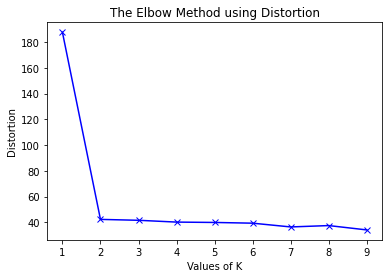

In [36]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

distortions = []
inertias = []
K = range(1, 10)
clustering = grouped_data.drop('Neighbourhood', 1)
 
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(clustering)
    kmeanModel.fit(clustering)
 
    distortions.append(sum(np.min(cdist(clustering, kmeanModel.cluster_centers_,'canberra'), axis=1)) / clustering.shape[0])
    inertias.append(kmeanModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Apply K means on data

In [37]:
kclusters = 2
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering)
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Insert the cluster labels in oringinal data frame

In [38]:
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
merged_data = Downtown_data
merged_data = merged_data.join(venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

merged_data

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,1,Park,Playground,Trail,Adult Boutique,Museum,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
1,M4X,Downtown Toronto,"St. James Town,Cabbagetown",43.667967,-79.367675,0,Coffee Shop,Pizza Place,Park,Café,Restaurant,Pub,Bakery,Chinese Restaurant,Italian Restaurant,Deli / Bodega
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Fast Food Restaurant,Hotel,Mediterranean Restaurant,Men's Store,Pub
3,M5A,Downtown Toronto,"Reagent Park,Harbourfront",43.654260,-79.360636,0,Coffee Shop,Café,Pub,Park,Bakery,Breakfast Spot,Theater,Event Space,Brewery,Chocolate Shop
4,M5B,Downtown Toronto,"Garden District,Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Italian Restaurant,Japanese Restaurant,Hotel,Café,Bubble Tea Shop,Cosmetics Shop,Middle Eastern Restaurant,Movie Theater
5,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Cocktail Bar,Gastropub,Cosmetics Shop,Clothing Store,Department Store,Seafood Restaurant,Gym,Lingerie Store
6,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Pharmacy,Cheese Shop,Seafood Restaurant,Restaurant,Farmers Market,Breakfast Spot
7,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Burger Joint,Japanese Restaurant,Salad Place,Bubble Tea Shop,Spa,Portuguese Restaurant
8,M5H,Downtown Toronto,"Richmond,Adelaide",43.650571,-79.384568,0,Coffee Shop,Café,Restaurant,Thai Restaurant,Gym,Deli / Bodega,Clothing Store,Cosmetics Shop,Bakery,Burrito Place
9,M5J,Downtown Toronto,"Union Station,Toronto Islands,Harbourfront East",43.640816,-79.381752,0,Coffee Shop,Aquarium,Café,Hotel,Brewery,Scenic Lookout,Pizza Place,Restaurant,Italian Restaurant,Fried Chicken Joint


Create map and display clusters

In [39]:
map_clusters = folium.Map(location=[lat,long], zoom_start=11) 

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(merged_data['Latitude'], merged_data['Longitude'], merged_data['Neighbourhood'], merged_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
merged_data.loc[merged_data['Cluster Labels'] == 0, merged_data.columns[[1] + list(range(5, merged_data.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Downtown Toronto,0,Coffee Shop,Pizza Place,Park,Café,Restaurant,Pub,Bakery,Chinese Restaurant,Italian Restaurant,Deli / Bodega
2,Downtown Toronto,0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Fast Food Restaurant,Hotel,Mediterranean Restaurant,Men's Store,Pub
3,Downtown Toronto,0,Coffee Shop,Café,Pub,Park,Bakery,Breakfast Spot,Theater,Event Space,Brewery,Chocolate Shop
4,Downtown Toronto,0,Clothing Store,Coffee Shop,Italian Restaurant,Japanese Restaurant,Hotel,Café,Bubble Tea Shop,Cosmetics Shop,Middle Eastern Restaurant,Movie Theater
5,Downtown Toronto,0,Coffee Shop,Café,Cocktail Bar,Gastropub,Cosmetics Shop,Clothing Store,Department Store,Seafood Restaurant,Gym,Lingerie Store
6,Downtown Toronto,0,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Pharmacy,Cheese Shop,Seafood Restaurant,Restaurant,Farmers Market,Breakfast Spot
7,Downtown Toronto,0,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Burger Joint,Japanese Restaurant,Salad Place,Bubble Tea Shop,Spa,Portuguese Restaurant
8,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Thai Restaurant,Gym,Deli / Bodega,Clothing Store,Cosmetics Shop,Bakery,Burrito Place
9,Downtown Toronto,0,Coffee Shop,Aquarium,Café,Hotel,Brewery,Scenic Lookout,Pizza Place,Restaurant,Italian Restaurant,Fried Chicken Joint
10,Downtown Toronto,0,Coffee Shop,Hotel,Café,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,Salad Place,Restaurant,Sporting Goods Shop,Beer Bar


In [41]:
merged_data.loc[merged_data['Cluster Labels'] == 1, merged_data.columns[[1] + list(range(5, merged_data.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,1,Park,Playground,Trail,Adult Boutique,Museum,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
